# Principal Component Analysis

Linear Feature Extraction Technique

## Read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
breast_cancer = load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [3]:
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Information about the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
y_values = breast_cancer['target']

In [6]:
X_values = data.values

In [7]:
X_values.shape

(569, 30)

## Standardize the features

In [8]:
means = X_values.mean(axis = 0)

In [9]:
std_devs = X_values.std(axis = 0)

In [10]:
X_std = (X_values - means)/std_devs

In [11]:
X_std.shape

(569, 30)

In [12]:
np.round(X_std.mean(axis = 0))

array([-0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0.,
        0., -0., -0.,  0.])

In [13]:
np.round(X_std.std(axis=0))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Calculate the covariance matrix

In [14]:
C = np.corrcoef(X_std.T)

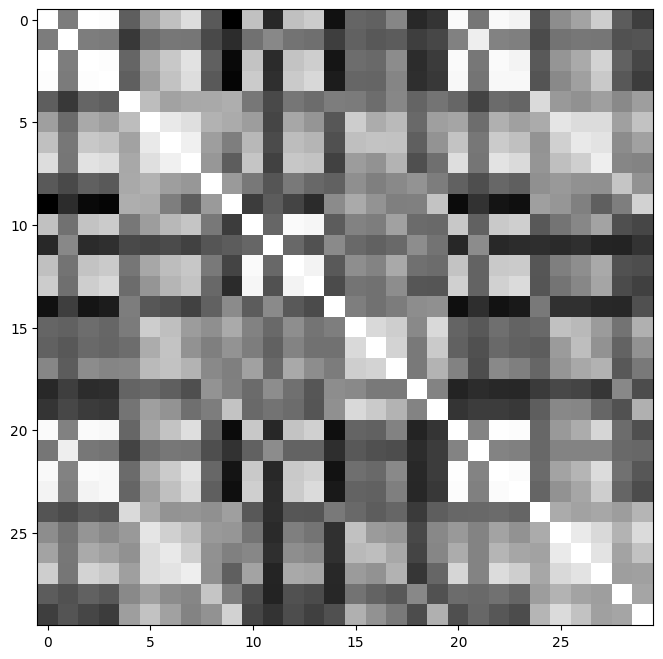

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(C, cmap='gray', interpolation='nearest')
plt.show()

## Calculate the Eigen values and Eigen Vectors of Covariance Matrix

In [16]:
w, v = np.linalg.eig(C)  # w = eigenvalues, v = eigenvectors

In [17]:
v.shape

(30, 30)

In [18]:
w.shape

(30,)

## Scree plot (with normalized values of eigen values)

In [19]:
sum_of_eig_values = np.sum(w)
sum_of_eig_values

np.float64(30.000000000000007)

In [20]:
w_norm = w / sum_of_eig_values
w_norm

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 4.43482743e-06,
       2.49601032e-05, 5.29779290e-05, 2.30015463e-04, 2.72587995e-04,
       5.16042379e-04, 6.01833567e-04, 8.11361259e-04, 9.14646751e-04,
       1.03864675e-03, 9.99096464e-04])

In [21]:
explained_variance = np.cumsum(w_norm)

In [22]:
explained_variance

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99453783,
       0.99456279, 0.99461577, 0.99484578, 0.99511837, 0.99563442,
       0.99623625, 0.99704761, 0.99796226, 0.9990009 , 1.        ])

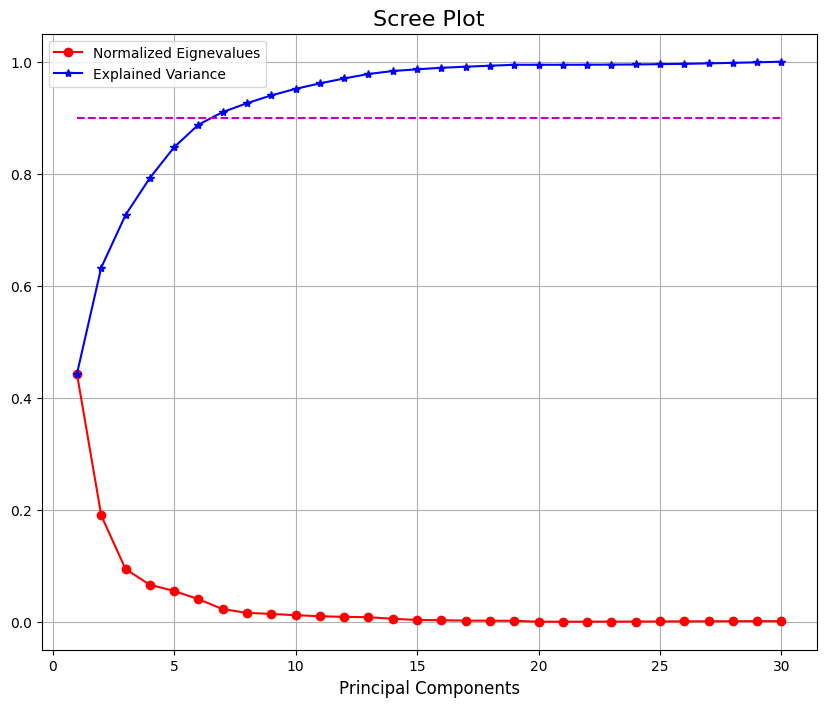

In [23]:
threshold = 0.9

plt.figure(figsize=(10,8))
plt.plot(np.arange(1, len(w_norm)+1), w_norm, 'ro-', label='Normalized Eignevalues')
plt.plot(np.arange(1, len(w_norm)+1), explained_variance, 'b*-', label='Explained Variance')
plt.grid()
plt.title("Scree Plot", fontsize=16)
plt.xlabel("Principal Components", fontsize=12)
plt.plot(np.arange(1, len(w_norm)+1), [threshold]*len(w_norm), linestyle='dashed', color='m')
plt.legend()
plt.show()

## Select the number of components

From the scree plot we can see that first 7 eigen values will explain more than 90% of the variance in the dataset.

k = 7

In [24]:
k = np.argmax(explained_variance >= threshold) + 1
print(k)

U = v[:,:k]

7


In [25]:
U.shape

(30, 7)

## Transform the dataset

In [26]:
X_transform = np.dot(X_std, U)

In [27]:
X_transform.shape

(569, 7)

This X_transform we can use for further downstream tasks (classification)

## Visualize the data in 2D

We will take first two principal components and project the data along these two components

In [28]:
X_tr_viz = np.dot(X_std, U[:,:])

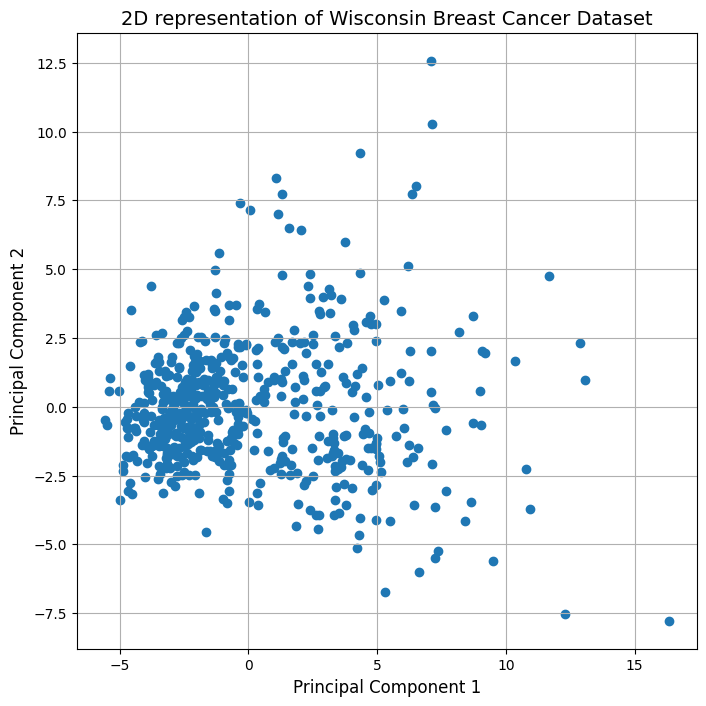

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(X_tr_viz[:,0], X_tr_viz[:,1])
plt.grid()
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("2D representation of Wisconsin Breast Cancer Dataset", fontsize=14)
plt.show()

In [30]:
import seaborn as sns

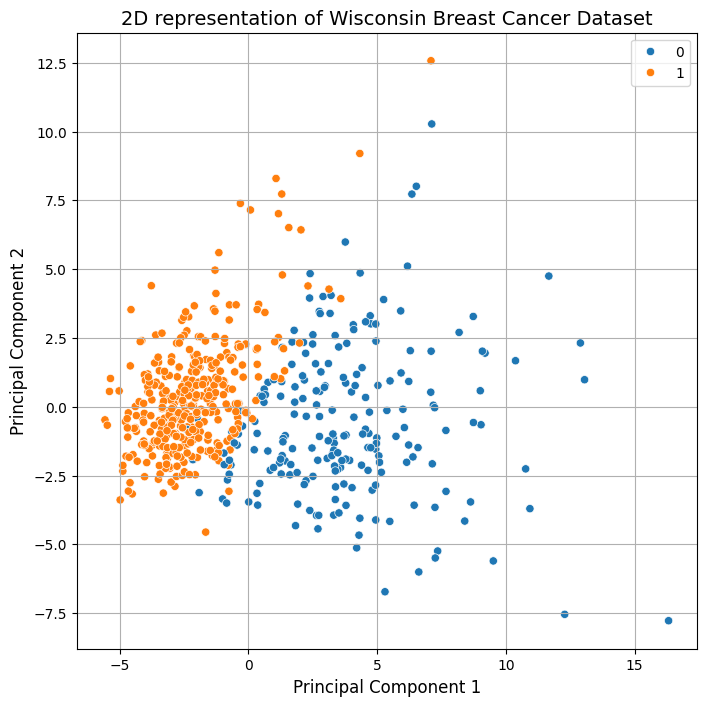

In [31]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_tr_viz[:,0], y=X_tr_viz[:,1], hue=y_values)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("2D representation of Wisconsin Breast Cancer Dataset", fontsize=14)
plt.show()

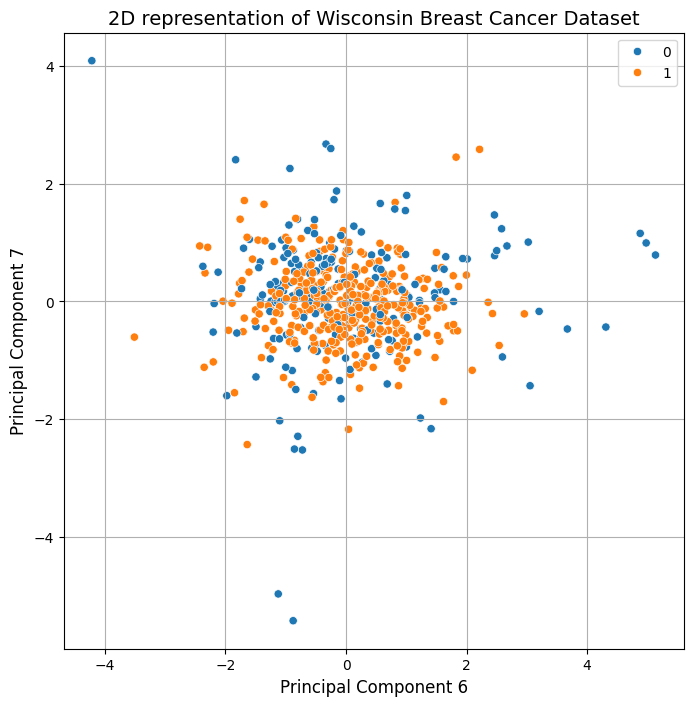

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_transform[:,5], y=X_transform[:,6], hue=y_values)
plt.grid()
plt.xlabel("Principal Component 6", fontsize=12)
plt.ylabel("Principal Component 7", fontsize=12)
plt.title("2D representation of Wisconsin Breast Cancer Dataset", fontsize=14)
plt.show()

### Sklearn PCA

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_std)   # need to use standardized features

In [35]:
X_pca.shape

(569, 7)

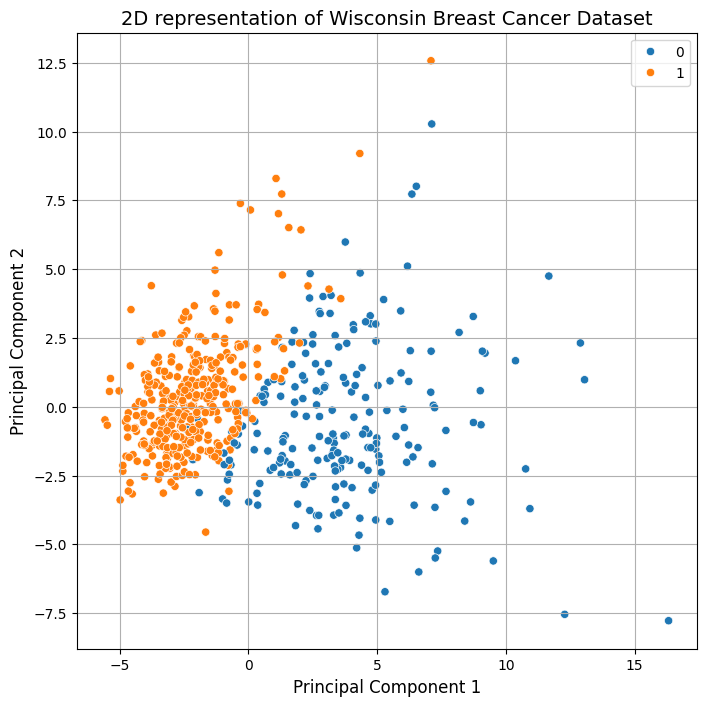

In [36]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_values)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("2D representation of Wisconsin Breast Cancer Dataset", fontsize=14)
plt.show()

In [37]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]


In [38]:
sum(pca.explained_variance_ratio_)

np.float64(0.9100953006967311)

In [39]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 ])